In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
housing = pd.read_csv('data-main/housing/housing.csv')
housing.shape

(20640, 10)

We have 10 columns and 20,000 rows. Observations. 


In [3]:
housing.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [4]:
housing["ocean_proximity"].unique()


array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

There are a total of 5 values that are unique. We can see how many are in each type

In [5]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

Getting a sense on the other attributes

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

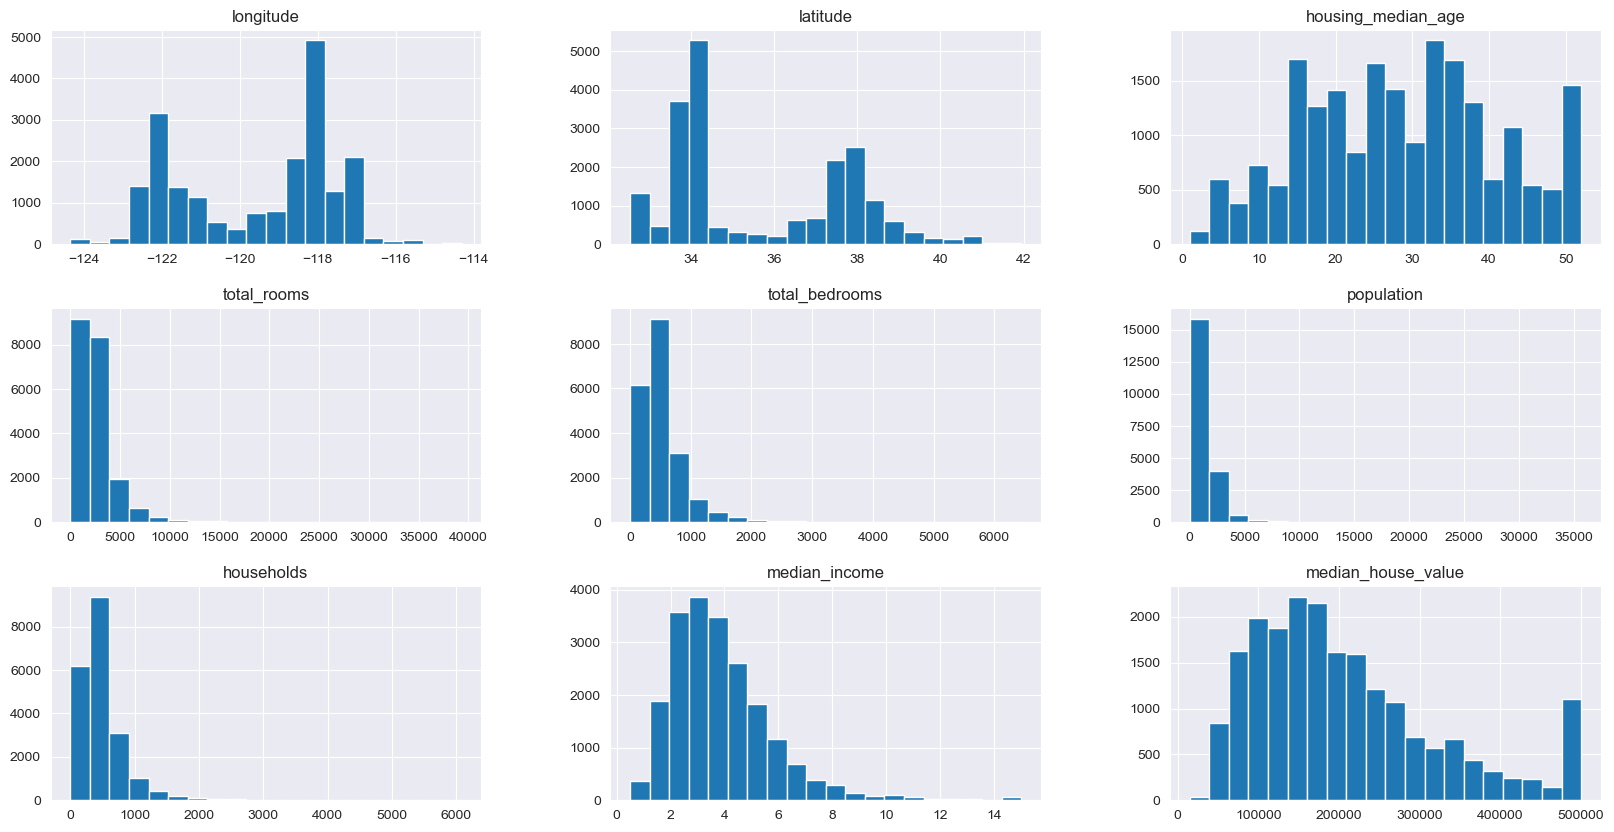

In [7]:
housing.hist(bins=20, figsize=(20,10))

<Axes: >

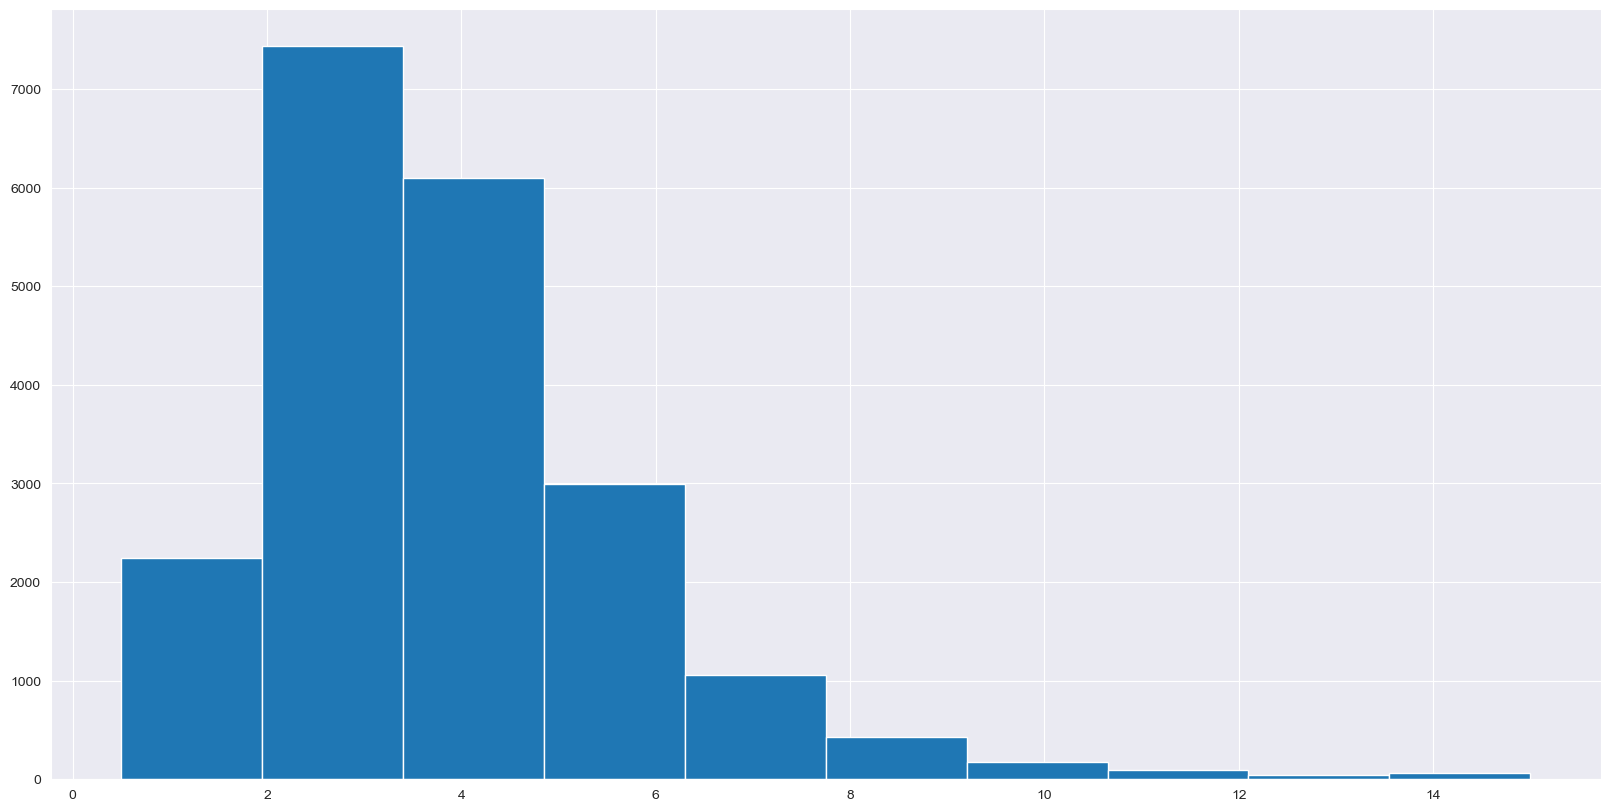

In [8]:
housing["median_income"].hist(bins=10, figsize=(20,10))

<Axes: xlabel='median_income', ylabel='population'>

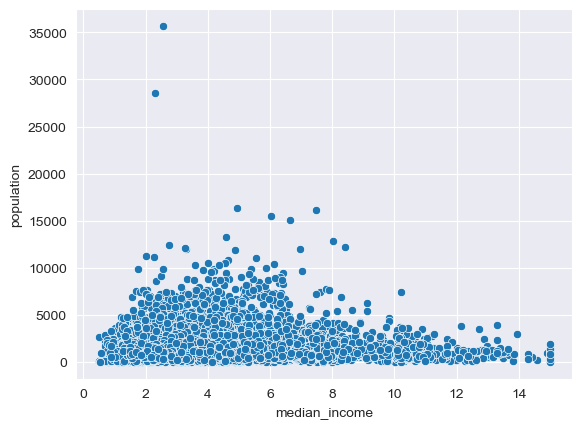

In [9]:
sns.scatterplot(x="median_income", y="population", data=housing)

/Users/joseluna/anaconda3/envs/data_science/lib/python3.12/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


<Axes: xlabel='latitude', ylabel='longitude'>

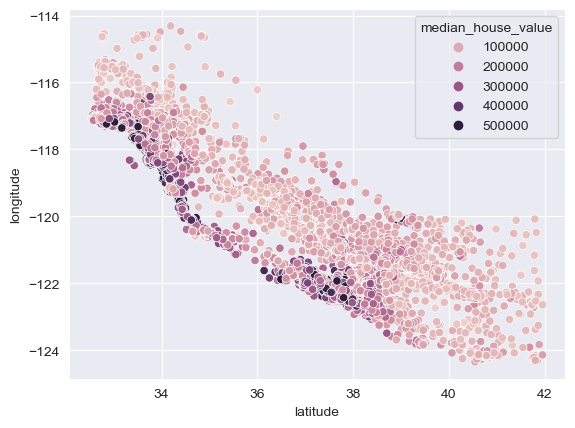

In [10]:
sns.scatterplot(x="latitude", y="longitude", data=housing, hue="median_house_value", cmap="jet")

# Stratefy
# Random Sample

In [11]:
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, random_state=42)
len(strat_train_set)/len(strat_test_set)

4.0

### Finding correlations
Since the dataset is not that big we can compute the correlations as it doesnt take alot of processing power        


In [12]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [13]:
corr_matrix["median_income"].sort_values(ascending=False)

median_income         1.000000
median_house_value    0.688075
total_rooms           0.198050
households            0.013033
population            0.004834
total_bedrooms       -0.007723
longitude            -0.015176
latitude             -0.079809
housing_median_age   -0.119034
Name: median_income, dtype: float64

<Axes: xlabel='median_income', ylabel='median_house_value'>

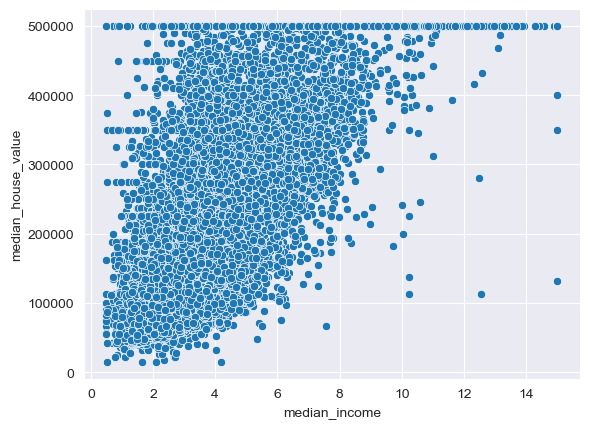

In [14]:
sns.scatterplot(x="median_income", y="median_house_value", data=housing)

In [15]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

## Cleaning Data
    1 Drop NA. Look for missing values in the dataset and make sure that all NA/NULL values are
    Use simple imputer to fill the missing values with the mean or the median. This only works with numerical dataset

In [16]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

In [17]:
# selecting data with numerical data
housing_num = housing.select_dtypes(include=[np.number])
# fitting the data to the inputer
imputer.fit(housing_num)
X = imputer.transform(housing_num)

## Imputer
There are also other methods that can be super useful for missing values
1   KNN: Use Knn to assign value based on similar features


In [18]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)


### Working with Ordinal and categorical Data

In [19]:
housing_cat = housing[["ocean_proximity"]]
housing_cat

,ocean_proximity
14196,NEAR OCEAN
8267,NEAR OCEAN
17445,NEAR BAY
14265,<1H OCEAN
2271,INLAND
...,...
11284,NEAR BAY
11964,<1H OCEAN
5390,INLAND
860,INLAND


In [20]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoder = ordinal_encoder.fit_transform(housing_cat)
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

#### Ohe hot encoder

In [21]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
# returns a sparce matrix. Mostly 0 and 1. allows for computational processing. 

housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

#### One hot encoder vs Dummy
One hot encoder remembers the data it was trained on. It remembers the categories it was trained on. It raises an exception if the data we feed is not was not previously assigned. 

*   If a category has alot of categories than we should try and simplify

# Standardization and Normalization
    1   Min-Max
    We can use mix-max to rescale from 0 - 1.
 Machine Learning dont like tailed distributions. So before scaling data, we need to make sure that the distrubution of our data is

In [22]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
# Transforming all numerical data to -1 and 1
housing_num_min_max = min_max_scaler.fit_transform(housing_num)

In [23]:
# Standardization
# Value - mean / (Std)
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
housing_num_std_scaler = std_scaler.fit_transform(housing_num)


Inverse Transform
When we transform the target value we need to trasnform it back to have. We can use 


AttributeError: Rectangle.set() got an unexpected keyword argument 'normed'

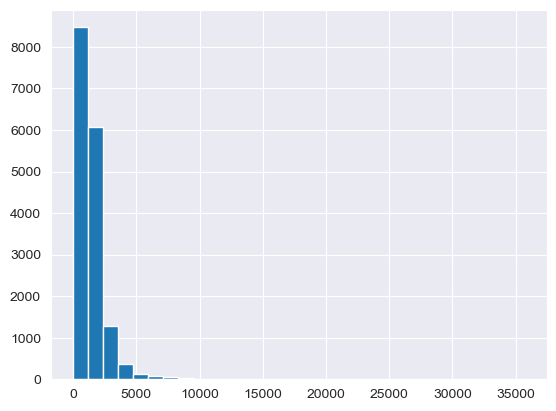

In [24]:
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
plt.hist(housing["population"], bins=30, normed=True)

In [ ]:
target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())
plt.hist(scaled_labels)


In [ ]:
model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)


In [ ]:
some_new_data = housing[["median_income"]].iloc[:5]
scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)
predictions

In [ ]:
from sklearn.compose import TransformedTargetRegressor
model = TransformedTargetRegressor(LinearRegression(), transformer=StandardScaler())
model.fit(housing[["median_income"]], housing_labels)
predictions = model.predict(some_new_data)
predictions

### Transformers Costume

In [ ]:
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer()

## Creating Pipelines
Using the pipeline function allows us to create a list of transformation
(name, transformer). The transformer need to have a fit-transform method

. 

In [ ]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('standardizer', StandardScaler())
])

Column Transformer requieres 3 tuples
We need (name, transformer, list of columns)
The name needs to be unique

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]

cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

## But this is better


In [ ]:
from sklearn.compose import make_column_transformer, make_column_selector
preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)), 
    
    (cat_pipeline, make_column_selector(dtype_include=object))
)

In [ ]:
housing_prepared= preprocessing.fit_transform(housing)
preprocessing.get_feature_names_out()


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.cluster import KMeans
class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state
    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self # always return self!
    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [ ]:
def column_ratio(X):
    return X[:,[0]] / X[:,[1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"] # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
    ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
    ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
    ("people_per_house", ratio_pipeline(), ["population", "households"]),
    ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                           "households", "median_income"]),
    ("geo", cluster_simil, ["latitude", "longitude"]),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
],
    remainder=default_num_pipeline) # one column remaining:


In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

In [ ]:
housing_predictions = lin_reg.predict(housing)
housing_predictions[:5].round(-2)
housing_labels.iloc[:5].values

In [ ]:
# this is what we fit in the Linear Regression

from sklearn.metrics import mean_squared_error
lin_rmse = mean_squared_error(housing_labels, housing_predictions,squared=False)
lin_rmse

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_regressor  =  make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_regressor.fit(housing, housing_labels)
housing_tree_prediction  =  tree_regressor.predict(housing)
tree_rmse = mean_squared_error(housing_labels, housing_tree_prediction)

### Cross Validation    

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
tress_rmse = -cross_val_score(tree_regressor, housing, housing_labels, scoring='neg_mean_squared_error', cv=10)
tress_rmse

In [ ]:
pd.Series(tress_rmse).describe()

What and why Cross Validation is bad? 

### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# forest_regressor =  

### Grid Search
How can we modify all hyper parameters. Looks for tghe completed 

### Random Search
Randomize Search